In [ ]:
!pip install pykan==0.0.5

In [ ]:
from train import *
from data import *
from models import *

EPOCHS = 20_000
SEED = 1337
INPUT_DIM = 2
OUTPUT_DIM = 2
LEARNING_RATE = 1e-3
HIDDEN_DIM = 200
NOISE = 0.0
LAM = 1e-5

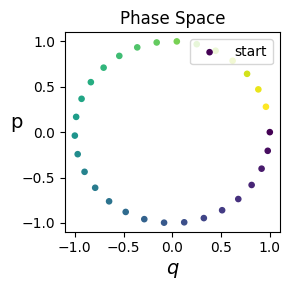

In [ ]:
show_pure_traj(spring_hamiltonian, y0=torch.tensor([1.0, 0.0]))

In [ ]:
d, m_hnn = prep_data_and_model(spring_hamiltonian, SEED, input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, output_dim=OUTPUT_DIM, noise_std=NOISE, use_kan=True, cut_kan=False)

BUILDING DATA
spring_hamiltonian


In [ ]:
m_hnn, s_hnn = train(d, m_hnn, SEED, learning_rate=LEARNING_RATE, epochs=EPOCHS, use_kan=False, enforce_sparsity=False, lambda_l1=LAM)

step 100, train_loss 5.8341e-05, test_loss 7.4203e-05
step 200, train_loss 3.1229e-06, test_loss 3.7392e-06
step 300, train_loss 2.7734e-06, test_loss 3.2244e-06
step 400, train_loss 2.6971e-06, test_loss 3.1110e-06
step 500, train_loss 2.6300e-06, test_loss 3.0114e-06
step 600, train_loss 2.5721e-06, test_loss 2.9288e-06
step 700, train_loss 2.5227e-06, test_loss 2.8590e-06
step 800, train_loss 2.4807e-06, test_loss 2.8007e-06
step 900, train_loss 2.4447e-06, test_loss 2.7506e-06
step 1000, train_loss 2.4135e-06, test_loss 2.7081e-06
step 1100, train_loss 2.3861e-06, test_loss 2.6705e-06
step 1200, train_loss 2.3617e-06, test_loss 2.6374e-06
step 1300, train_loss 2.3401e-06, test_loss 2.6078e-06
step 1400, train_loss 2.3203e-06, test_loss 2.5808e-06
step 1500, train_loss 2.3020e-06, test_loss 2.5563e-06
step 1600, train_loss 2.2850e-06, test_loss 2.5329e-06
step 1700, train_loss 2.2686e-06, test_loss 2.5097e-06
step 1800, train_loss 2.2520e-06, test_loss 2.4861e-06
step 1900, train_lo

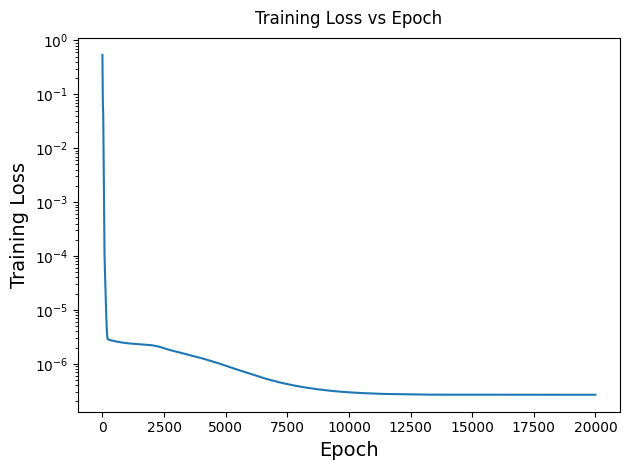

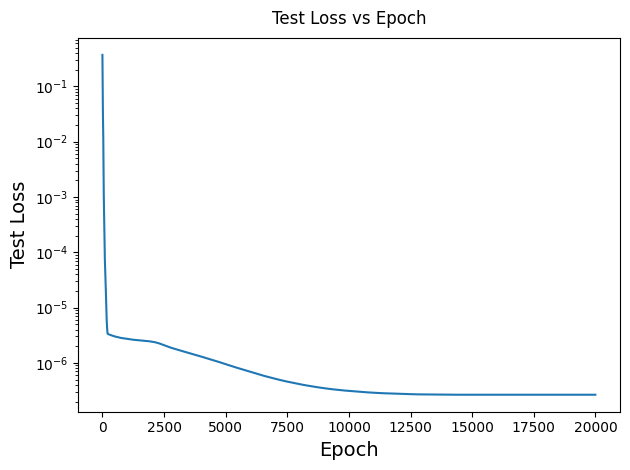

In [ ]:
plot_loss(s_hnn, SEED=SEED)

In [ ]:
#SEED = SEED+2

In [ ]:
_, m_kan = prep_data_and_model(spring_hamiltonian, SEED, input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, output_dim=OUTPUT_DIM, noise_std=NOISE, use_kan=True, cut_kan=False)

BUILDING DATA
spring_hamiltonian


In [ ]:
m_kan, s_kan = train(d, m_kan, SEED, learning_rate=LEARNING_RATE, epochs=EPOCHS, use_kan=True, enforce_sparsity=False, lambda_l1=LAM)

step 100, train_loss 6.3332e-05, test_loss 8.0119e-05
step 200, train_loss 3.1923e-06, test_loss 3.8366e-06
step 300, train_loss 2.8010e-06, test_loss 3.2597e-06
step 400, train_loss 2.7226e-06, test_loss 3.1412e-06
step 500, train_loss 2.6544e-06, test_loss 3.0378e-06
step 600, train_loss 2.5963e-06, test_loss 2.9490e-06
step 700, train_loss 2.5460e-06, test_loss 2.8708e-06
step 800, train_loss 2.5007e-06, test_loss 2.8007e-06
step 900, train_loss 2.4568e-06, test_loss 2.7320e-06
step 1000, train_loss 2.4095e-06, test_loss 2.6597e-06
step 1100, train_loss 2.3498e-06, test_loss 2.5721e-06
step 1200, train_loss 1.9338e-06, test_loss 2.0611e-06
step 1300, train_loss 1.8466e-06, test_loss 1.9658e-06
step 1400, train_loss 1.7684e-06, test_loss 1.8823e-06
step 1500, train_loss 1.6987e-06, test_loss 1.8084e-06
step 1600, train_loss 1.6356e-06, test_loss 1.7427e-06
step 1700, train_loss 1.5748e-06, test_loss 1.6798e-06
step 1800, train_loss 1.5187e-06, test_loss 1.6221e-06
step 1900, train_lo

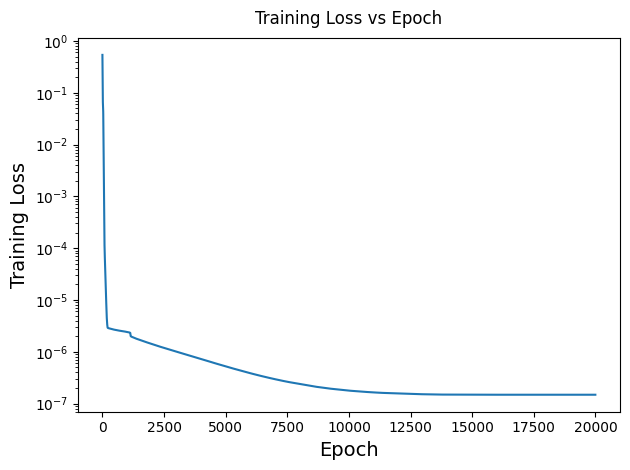

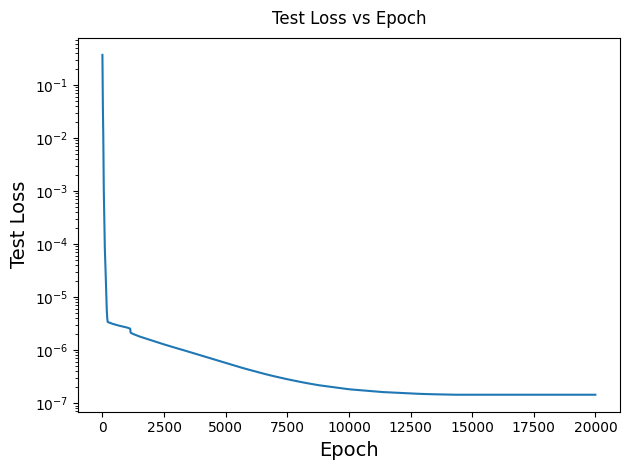

In [ ]:
plot_loss(s_kan, SEED=SEED+1)

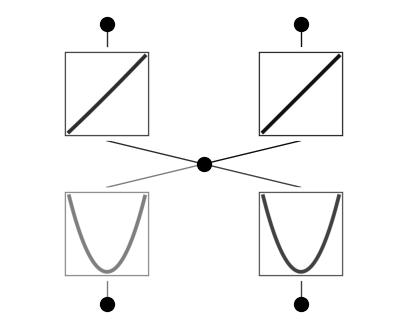

In [ ]:
model = m_kan.differentiable_model
model.plot()

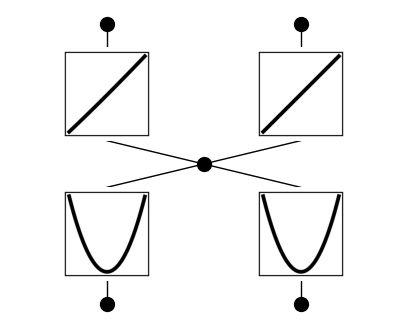

In [ ]:
model.plot(beta=1_000_000)

In [ ]:
print(model.acts_scale)
model.acts_scale

[tensor([[0.1854, 0.3227]], grad_fn=<DivBackward0>), tensor([[0.3893],
        [0.5917]], grad_fn=<DivBackward0>)]


[tensor([[0.1854, 0.3227]], grad_fn=<DivBackward0>),
 tensor([[0.3893],
         [0.5917]], grad_fn=<DivBackward0>)]

In [ ]:
model.fix_symbolic(0,0,0,"x^2")
model.fix_symbolic(0,1,0,"x^2")
model.fix_symbolic(1,0,0,"x")
model.fix_symbolic(1,0,1,"x")
model.symbolic_formula()

r2 is 1.0000001192092896
r2 is 1.0000003576278687
r2 is 0.9997937679290771
r2 is 1.0000003576278687


([0.64*x_1**2 + 0.64*x_2**2 + 0.61, 1.0*x_1**2 + 1.0*x_2**2 + 0.92],
 [x_1, x_2])

spring_hamiltonian
INTEGRATING...


/usr/local/lib/python3.10/dist-packages/kan/KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))


INTEGRATING...


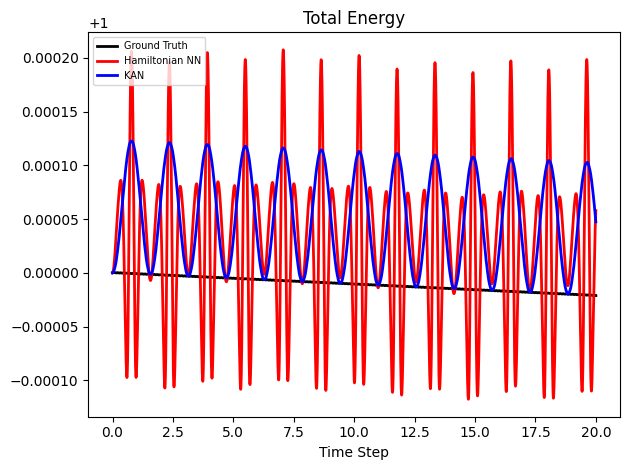

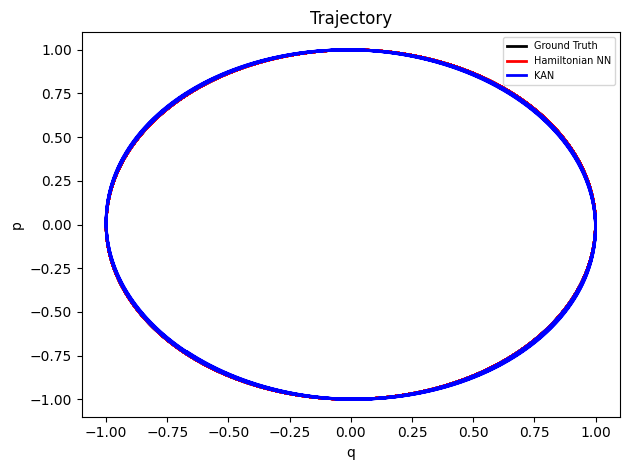

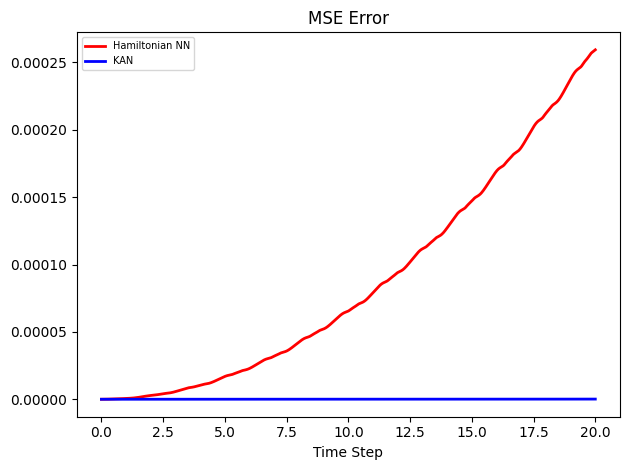

In [ ]:
plot_model(m_hnn, m_kan, spring_hamiltonian, t_span=[0,20], y0=torch.tensor([1.0, 0.0]), rtol=1e-12, SEED=SEED)

In [ ]:
_, m_kan_sparse = prep_data_and_model(spring_hamiltonian, SEED, input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, output_dim=OUTPUT_DIM, noise_std=NOISE, use_kan=True, cut_kan=False)

BUILDING DATA
spring_hamiltonian


In [ ]:
m_kan_sparse, s_kan_sparse = train(d, m_kan_sparse, SEED, learning_rate=LEARNING_RATE, epochs=EPOCHS, use_kan=True, enforce_sparsity=True, lambda_l1=LAM)

step 100, train_loss 2.9488e-05, test_loss 3.8267e-05
step 200, train_loss 1.0941e-06, test_loss 1.3337e-06
step 300, train_loss 6.8465e-07, test_loss 5.7066e-07
step 400, train_loss 4.8970e-07, test_loss 4.3302e-07
step 500, train_loss 5.7101e-07, test_loss 5.9912e-07
step 600, train_loss 5.2862e-07, test_loss 5.6515e-07
step 700, train_loss 5.1817e-07, test_loss 5.3673e-07
step 800, train_loss 5.1181e-07, test_loss 5.1957e-07
step 900, train_loss 5.2656e-07, test_loss 5.3541e-07
step 1000, train_loss 5.9696e-07, test_loss 5.9061e-07
step 1100, train_loss 5.9464e-07, test_loss 5.9040e-07
step 1200, train_loss 5.8807e-07, test_loss 5.8658e-07
step 1300, train_loss 4.4543e-07, test_loss 4.7518e-07
step 1400, train_loss 4.2655e-07, test_loss 4.6130e-07
step 1500, train_loss 4.0824e-07, test_loss 4.4259e-07
step 1600, train_loss 3.9135e-07, test_loss 4.2921e-07
step 1700, train_loss 3.7647e-07, test_loss 4.1441e-07
step 1800, train_loss 3.6052e-07, test_loss 4.0161e-07
step 1900, train_lo

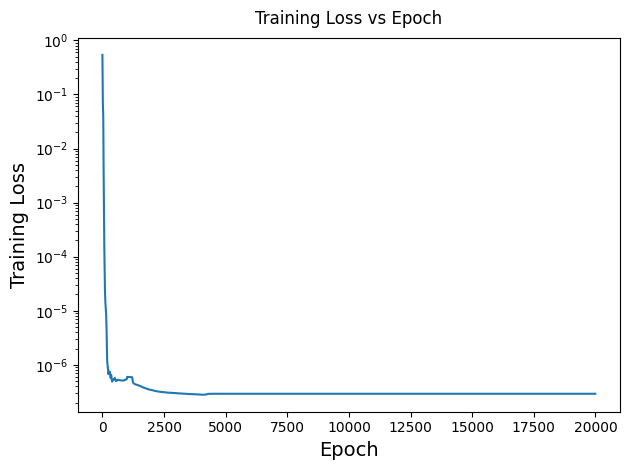

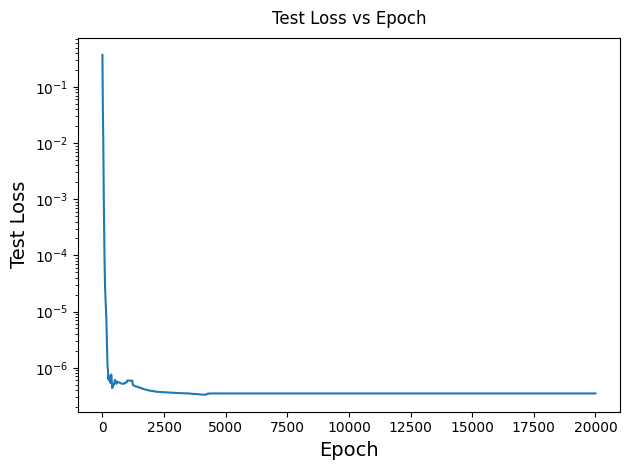

In [ ]:
plot_loss(s_kan_sparse, SEED=SEED+2)

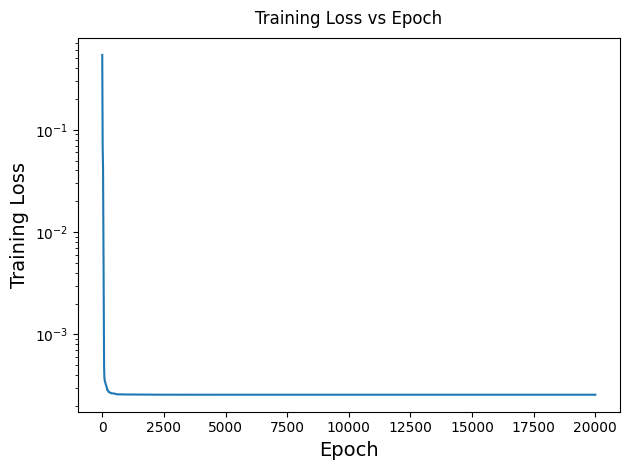

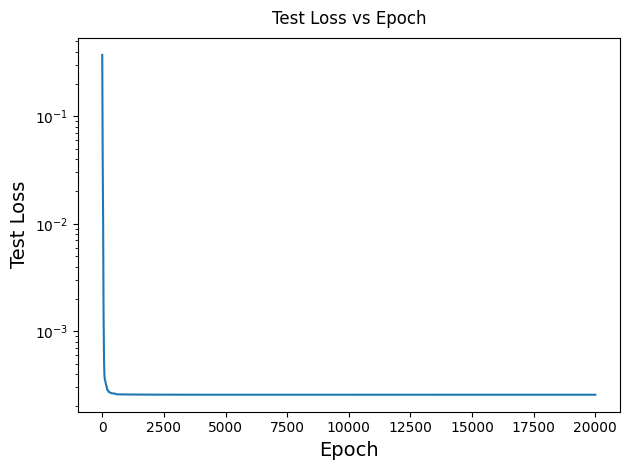

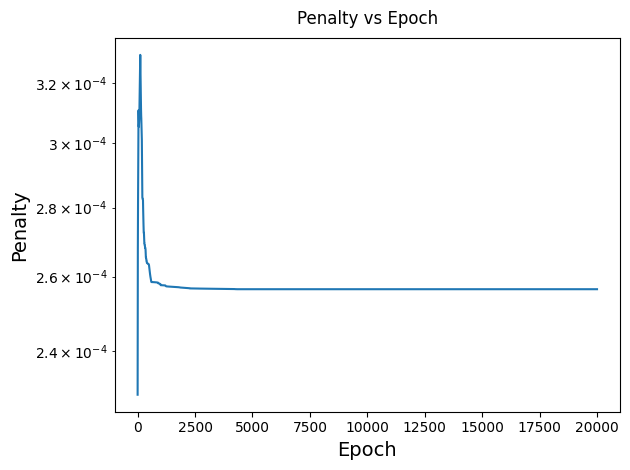

In [ ]:
plot_loss(s_kan_sparse, SEED=SEED+200, include_penalty=True)

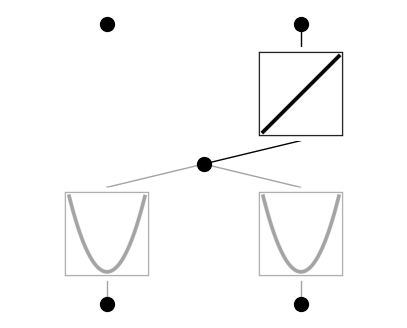

In [ ]:
model = m_kan_sparse.differentiable_model
model.plot()

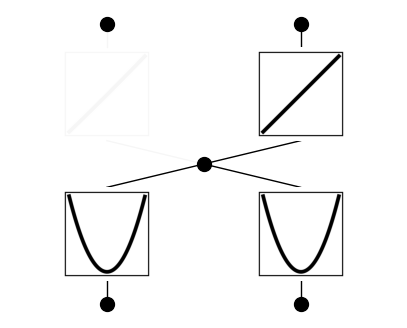

In [ ]:
model.plot(beta=1_000_000)

In [ ]:
print(model.acts_scale)
model.acts_scale

[tensor([[0.1252, 0.1253]], grad_fn=<DivBackward0>), tensor([[3.6021e-08],
        [9.7551e-01]], grad_fn=<DivBackward0>)]


[tensor([[0.1252, 0.1253]], grad_fn=<DivBackward0>),
 tensor([[3.6021e-08],
         [9.7551e-01]], grad_fn=<DivBackward0>)]

In [ ]:
model.fix_symbolic(0,0,0,"x^2")
model.fix_symbolic(0,1,0,"x^2")
model.fix_symbolic(1,0,0,"x")
model.fix_symbolic(1,0,1,"x")
model.symbolic_formula()

r2 is 1.0000003576278687
r2 is 1.0000003576278687
Best value at boundary.
r2 is 1.1425278501064895e-07
r2 is not very high, please double check if you are choosing the correct symbolic function.
r2 is 1.000000238418579


([0, 1.0*x_1**2 + 1.0*x_2**2 + 1.69], [x_1, x_2])

spring_hamiltonian
INTEGRATING...


/usr/local/lib/python3.10/dist-packages/kan/KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))


INTEGRATING...


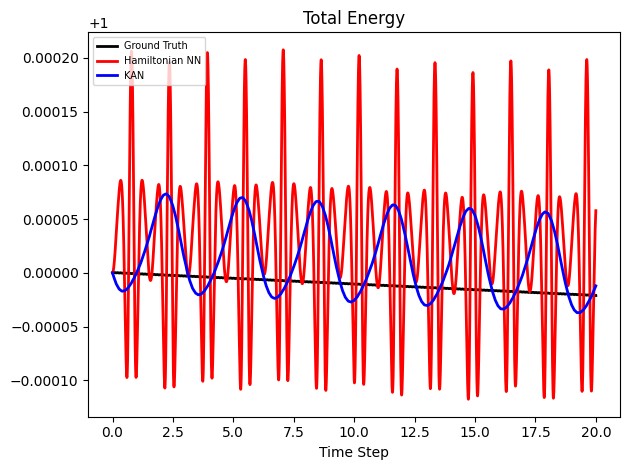

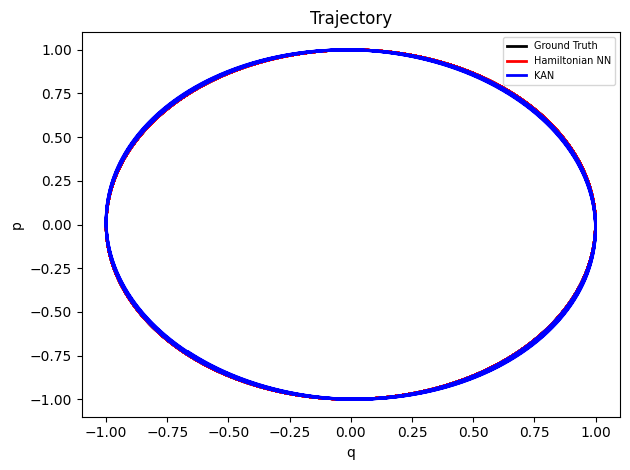

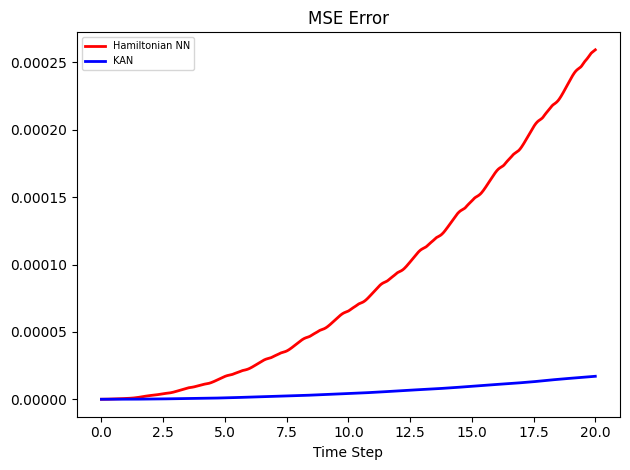

In [ ]:
plot_model(m_hnn, m_kan_sparse, spring_hamiltonian, t_span=[0,20], y0=torch.tensor([1.0, 0.0]), rtol=1e-12, SEED=SEED+2)